# Feature Engineering 2
Test features

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

bullet_train = pd.read_csv('output/train_features.csv')
bullet_val = pd.read_csv('output/val_features.csv')
bullet_test = pd.read_csv('output/test_features.csv')

bullet_train.head()

,line_length,verb_percentage,stopword_percentage,punctuation_percentage,line_length_trans,stopword_percentage_trans,punctuation_percentage_trans
0,9,0.0,0.0,0.0,1.245731,0.000000,0.000000
1,71,6.2,5.6,1.4,1.531531,2.366432,1.183216
2,5,0.0,20.0,0.0,1.174619,4.472136,0.000000
3,36,0.0,0.0,0.0,1.430969,0.000000,0.000000
4,15,0.0,0.0,6.7,1.311019,0.000000,2.588436


In [6]:
# Define a list of features to be used for each dataset
raw_original_features = ['line_length', 'verb_percentage', 'stopword_percentage','punctuation_percentage']

transformed_features = ['line_length_trans', 'stopword_percentage_trans', 'punctuation_percentage_trans']

all_features = ['line_length', 'verb_percentage', 'stopword_percentage','punctuation_percentage', 'line_length_trans', 'stopword_percentage_trans', 'punctuation_percentage_trans']



In [7]:
# Write out all data
bullet_train[raw_original_features].to_csv('output/train_features_raw.csv',index=False)
bullet_val[raw_original_features].to_csv('output/val_features_raw.csv',index=False)
bullet_test[raw_original_features].to_csv('output/test_features_raw.csv',index=False)

bullet_train[transformed_features].to_csv('output/train_features_trans.csv',index=False)
bullet_val[transformed_features].to_csv('output/val_features_trans.csv',index=False)
bullet_test[transformed_features].to_csv('output/test_features_trans.csv',index=False)

bullet_train[all_features].to_csv('output/train_features_all.csv',index=False)
bullet_val[all_features].to_csv('output/val_features_all.csv',index=False)
bullet_test[all_features].to_csv('output/test_features_all.csv',index=False)

In [8]:
train_features = pd.read_csv('output/train_features_raw.csv')
train_labels = pd.read_csv('output/train_labels.csv')

train_features.head()

,line_length,verb_percentage,stopword_percentage,punctuation_percentage
0,9,0.0,0.0,0.0
1,71,6.2,5.6,1.4
2,5,0.0,20.0,0.0
3,36,0.0,0.0,0.0
4,15,0.0,0.0,6.7


<AxesSubplot:>

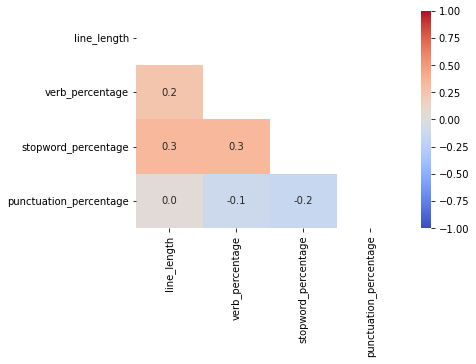

In [9]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

## GridSearchCV

In [16]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}.'.format(round(mean, 3), round(std*2, 3), params))

In [17]:
 # GridSearch
# Instantiate a RandomForestClassifier
rf = RandomForestClassifier()
# Create a dictionary with the parameters to check
parameters ={
    'n_estimators':[2**i for i in range(3,10)],
    'max_depth':[2, 4, 8, 16, 32, None]
}
# Instantiate a GridSearchCV object, passing the RandomForestClassifier, paramaters,
# and number of "K-folds" (we are using 5)
cv = GridSearchCV(rf, parameters, cv=5)

# Like all scikit-learn objects, cv must be fit. Input values must be arrays
cv.fit(train_features, train_labels.values.ravel())

# This will give us the best hyperparameter settings given this set of data
print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 64}

0.846 (+/-0.079) for {'max_depth': 2, 'n_estimators': 8}.
0.844 (+/-0.069) for {'max_depth': 2, 'n_estimators': 16}.
0.849 (+/-0.044) for {'max_depth': 2, 'n_estimators': 32}.
0.861 (+/-0.05) for {'max_depth': 2, 'n_estimators': 64}.
0.854 (+/-0.049) for {'max_depth': 2, 'n_estimators': 128}.
0.859 (+/-0.051) for {'max_depth': 2, 'n_estimators': 256}.
0.856 (+/-0.054) for {'max_depth': 2, 'n_estimators': 512}.
0.847 (+/-0.072) for {'max_depth': 4, 'n_estimators': 8}.
0.856 (+/-0.058) for {'max_depth': 4, 'n_estimators': 16}.
0.854 (+/-0.051) for {'max_depth': 4, 'n_estimators': 32}.
0.859 (+/-0.05) for {'max_depth': 4, 'n_estimators': 64}.
0.857 (+/-0.05) for {'max_depth': 4, 'n_estimators': 128}.
0.856 (+/-0.052) for {'max_depth': 4, 'n_estimators': 256}.
0.859 (+/-0.048) for {'max_depth': 4, 'n_estimators': 512}.
0.824 (+/-0.078) for {'max_depth': 8, 'n_estimators': 8}.
0.849 (+/-0.061) for {'max_depth': 8, 'n_estimators': 16}.
0.839

### Feature Importance

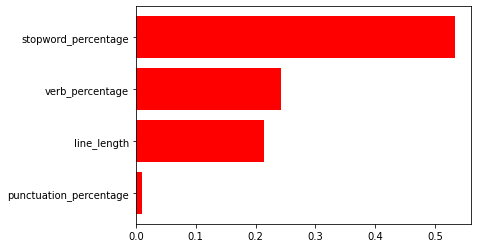

In [21]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model 

In [23]:
# GridSearchCV automatically makes a best_estimator_ atrribute on a riffiting of the model on 100% of the data
joblib.dump(cv.best_estimator_, 'models/mdl_raw_original_features.pkl')

['models/mdl_raw_original_features.pkl']

#### Repeat process for other models


In [24]:
# Transformed Features
train_features = pd.read_csv('output/train_features_trans.csv')
train_labels = pd.read_csv('output/train_labels.csv')

train_features.head()

,line_length_trans,stopword_percentage_trans,punctuation_percentage_trans
0,1.245731,0.000000,0.000000
1,1.531531,2.366432,1.183216
2,1.174619,4.472136,0.000000
3,1.430969,0.000000,0.000000
4,1.311019,0.000000,2.588436


<AxesSubplot:>

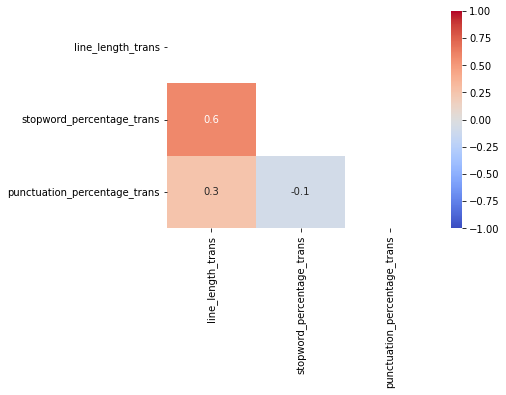

In [25]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [26]:
 # GridSearch
rf = RandomForestClassifier()
parameters ={
    'n_estimators':[2**i for i in range(3,10)],
    'max_depth':[2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 64}

0.841 (+/-0.052) for {'max_depth': 2, 'n_estimators': 8}.
0.831 (+/-0.046) for {'max_depth': 2, 'n_estimators': 16}.
0.851 (+/-0.069) for {'max_depth': 2, 'n_estimators': 32}.
0.836 (+/-0.049) for {'max_depth': 2, 'n_estimators': 64}.
0.837 (+/-0.064) for {'max_depth': 2, 'n_estimators': 128}.
0.839 (+/-0.069) for {'max_depth': 2, 'n_estimators': 256}.
0.839 (+/-0.07) for {'max_depth': 2, 'n_estimators': 512}.
0.837 (+/-0.036) for {'max_depth': 4, 'n_estimators': 8}.
0.849 (+/-0.052) for {'max_depth': 4, 'n_estimators': 16}.
0.851 (+/-0.068) for {'max_depth': 4, 'n_estimators': 32}.
0.854 (+/-0.046) for {'max_depth': 4, 'n_estimators': 64}.
0.844 (+/-0.055) for {'max_depth': 4, 'n_estimators': 128}.
0.852 (+/-0.048) for {'max_depth': 4, 'n_estimators': 256}.
0.847 (+/-0.057) for {'max_depth': 4, 'n_estimators': 512}.
0.826 (+/-0.059) for {'max_depth': 8, 'n_estimators': 8}.
0.831 (+/-0.071) for {'max_depth': 8, 'n_estimators': 16}.
0.8

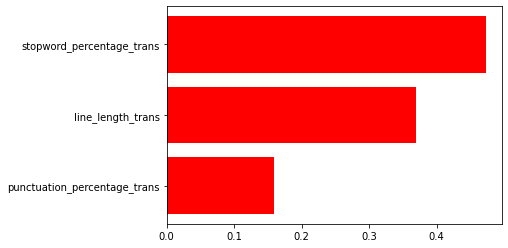

In [27]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [28]:
# GridSearchCV automatically makes a best_estimator_ atrribute on a riffiting of the model on 100% of the data
joblib.dump(cv.best_estimator_, 'models/mdl_transformed_features.pkl')

['models/mdl_transformed_features.pkl']

In [29]:
# All Features
train_features = pd.read_csv('output/train_features_all.csv')
train_labels = pd.read_csv('output/train_labels.csv')

train_features.head()

,line_length,verb_percentage,stopword_percentage,punctuation_percentage,line_length_trans,stopword_percentage_trans,punctuation_percentage_trans
0,9,0.0,0.0,0.0,1.245731,0.000000,0.000000
1,71,6.2,5.6,1.4,1.531531,2.366432,1.183216
2,5,0.0,20.0,0.0,1.174619,4.472136,0.000000
3,36,0.0,0.0,0.0,1.430969,0.000000,0.000000
4,15,0.0,0.0,6.7,1.311019,0.000000,2.588436


<AxesSubplot:>

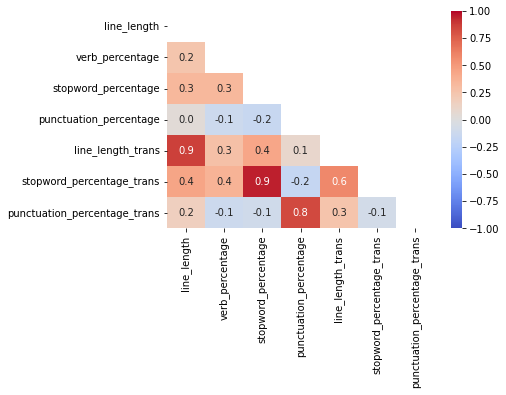

In [31]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [30]:
 # GridSearch
rf = RandomForestClassifier()
parameters ={
    'n_estimators':[2**i for i in range(3,10)],
    'max_depth':[2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 256}

0.856 (+/-0.057) for {'max_depth': 2, 'n_estimators': 8}.
0.834 (+/-0.077) for {'max_depth': 2, 'n_estimators': 16}.
0.857 (+/-0.063) for {'max_depth': 2, 'n_estimators': 32}.
0.859 (+/-0.062) for {'max_depth': 2, 'n_estimators': 64}.
0.859 (+/-0.056) for {'max_depth': 2, 'n_estimators': 128}.
0.862 (+/-0.061) for {'max_depth': 2, 'n_estimators': 256}.
0.862 (+/-0.063) for {'max_depth': 2, 'n_estimators': 512}.
0.859 (+/-0.057) for {'max_depth': 4, 'n_estimators': 8}.
0.861 (+/-0.046) for {'max_depth': 4, 'n_estimators': 16}.
0.856 (+/-0.054) for {'max_depth': 4, 'n_estimators': 32}.
0.856 (+/-0.05) for {'max_depth': 4, 'n_estimators': 64}.
0.861 (+/-0.057) for {'max_depth': 4, 'n_estimators': 128}.
0.852 (+/-0.056) for {'max_depth': 4, 'n_estimators': 256}.
0.856 (+/-0.052) for {'max_depth': 4, 'n_estimators': 512}.
0.836 (+/-0.053) for {'max_depth': 8, 'n_estimators': 8}.
0.841 (+/-0.053) for {'max_depth': 8, 'n_estimators': 16}.
0.

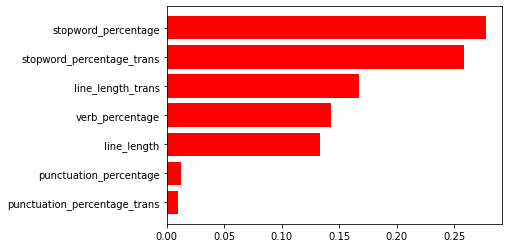

In [32]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [33]:
# GridSearchCV automatically makes a best_estimator_ atrribute on a riffiting of the model on 100% of the data
joblib.dump(cv.best_estimator_, 'models/mdl_all_features.pkl')

['models/mdl_all_features.pkl']